In [ ]:
! unzip /content/drive/MyDrive/cardiovascular.zip

Archive:  /content/drive/MyDrive/cardiovascular.zip
  inflating: cardio_train.csv        


Dataset link: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

Associated business report: https://docs.google.com/document/d/1WMDlLrDu0XVV043H8cK_rX0QXgbirhi0DBYWKL_2bw0/edit?usp=sharing

Public link to this notebook: https://colab.research.google.com/drive/1_okr3iS2orhn8u2cbpv6IRRTzD0K_eDN?usp=sharing

# DATASET FEATURES

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code | (1- women and 2- men)
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# INITIAL ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/cardio_train.csv", delimiter=";")

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(70000, 13)

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df['age']= df['age'] / 365.25

# UNIVARIATE ANALYSIS

In [ ]:
import plotly.express as px

# Create a histogram for age distribution
fig = px.histogram(df, x="age", nbins=30, title="Age Distribution by Gender (1:women and 2:men)", color="gender")
fig.update_xaxes(title="Age")
fig.update_yaxes(title="Count")
fig.show()


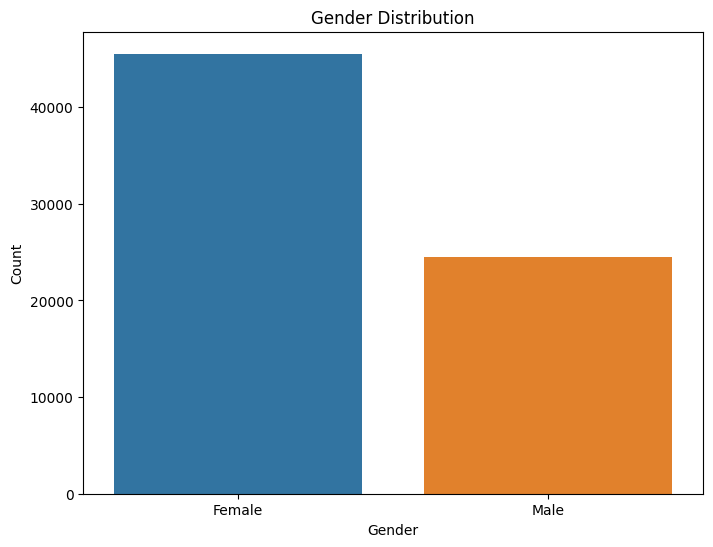

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

In [ ]:
# Create a pie chart for cholesterol levels
cholesterol_counts = df['cholesterol'].value_counts()
fig = px.pie(values=cholesterol_counts.values, names=["Normal", "Above normal", "Well above normal"], title="Cholesterol Levels Distribution")
fig.update_traces(textinfo='percent+label')
fig.show()


In [ ]:
# Cardiovascular Disease Prevalence
cardio_prevalence = df['cardio'].value_counts(normalize=True) * 100

import plotly.express as px
import plotly.graph_objects as go

# Create a pie chart
fig = px.pie(values=cardio_prevalence, names=['No Cardio Disease', 'Cardio Disease'], title='Cardiovascular Disease Prevalence')
fig.update_traces(textinfo='percent+label')
fig.show()

# BIVARIATE ANALYSIS

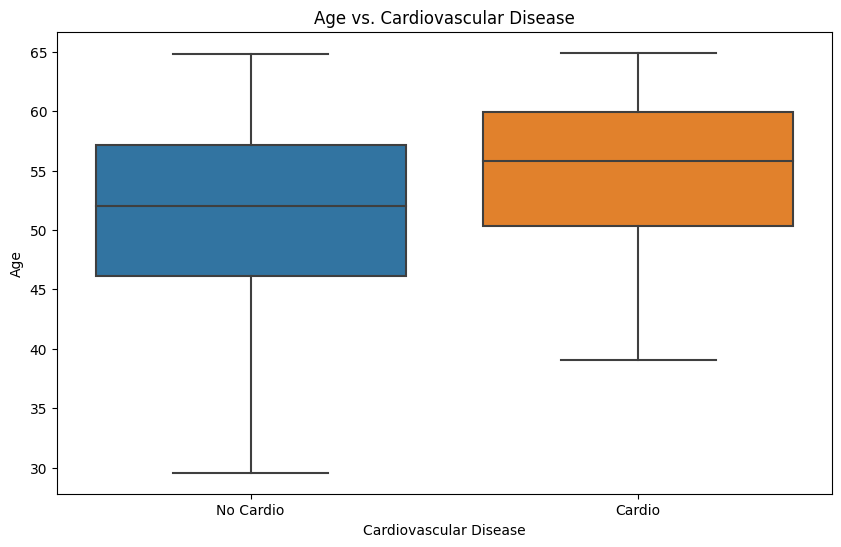

In [ ]:
# 1. Age vs. Cardiovascular Disease
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cardio', y='age')
plt.title('Age vs. Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Cardio', 'Cardio'])
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Create a DataFrame to calculate counts of smoking status by gender
smoking_gender_counts = df.groupby(['gender', 'smoke']).size().reset_index(name='count')
smoking_gender_counts['gender'] = smoking_gender_counts['gender'].map({1: 'Women', 2: 'Male'})
smoking_gender_counts['smoke'] = smoking_gender_counts['smoke'].map({0: 'Non-Smoker', 1: 'Smoker'})

# Create a side-by-side (grouped) bar chart for smoking status and hue by gender
fig = px.bar(smoking_gender_counts, x='smoke', y='count', color='gender', barmode='group',
             labels={'smoke':'Smoking Status', 'count':'Count'}, title="Smoking Status Distribution by Gender")
fig.update_xaxes(title="Smoking Status")
fig.update_yaxes(title="Count")
fig.show()


# HYPOTHESIS TESTING ON ALL FEATURES

In [ ]:
df.drop("id", inplace=True, axis=1)

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Load your dataset
# Replace 'df' with the actual variable name of your dataset
target_feature = 'cardio'

# Define lists of numeric and categorical features
numeric_features = ["age", "height", "weight", "ap_hi", "ap_lo"]
categorical_features = ["gender", "cholesterol", "smoke", "gluc", "alco", "active"]

# Create an empty DataFrame to store test results
test_results = pd.DataFrame(columns=['Feature', 'Test', 'Statistic', 'P-value', 'Decision/Conclusion'])

# Perform hypothesis tests for numeric features
for feature in numeric_features:
    cvd_yes = df[df[target_feature] == 1][feature]
    cvd_no = df[df[target_feature] == 0][feature]

    t_stat, p_value = ttest_ind(cvd_yes, cvd_no)

    if p_value < 0.05:
        decision = 'Significant (Reject H0)'
    else:
        decision = 'Not Significant (Fail to reject H0)'

    # Add test results to the DataFrame
    test_results = test_results.append({'Feature': feature,
                                        'Test': 't-test',
                                        'Statistic': t_stat,
                                        'P-value': p_value,
                                        'Decision/Conclusion': decision}, ignore_index=True)

# Perform chi-squared tests for categorical features
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target_feature])

    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    if p_value < 0.05:
        decision = 'Significant (Reject H0)'
    else:
        decision = 'Not Significant (Fail to reject H0)'

    # Add test results to the DataFrame
    test_results = test_results.append({'Feature': feature,
                                        'Test': 'Chi-squared',
                                        'Statistic': chi2,
                                        'P-value': p_value,
                                        'Decision/Conclusion': decision}, ignore_index=True)





<ipython-input-71-59b1eaf0dfab>:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-71-59b1eaf0dfab>:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-71-59b1eaf0dfab>:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-71-59b1eaf0dfab>:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-71-59b1eaf0dfab>:28: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-71-59b1eaf0dfab>:46: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [ ]:
test_results

,Feature,Test,Statistic,P-value,Decision/Conclusion
0,age,t-test,64.876868,0.000000e+00,Significant (Reject H0)
1,height,t-test,-2.863110,4.196299e-03,Significant (Reject H0)
2,weight,t-test,48.875125,0.000000e+00,Significant (Reject H0)
3,ap_hi,t-test,14.433971,3.698092e-47,Significant (Reject H0)
4,ap_lo,t-test,17.424954,7.424551e-68,Significant (Reject H0)
5,gender,Chi-squared,4.569519,3.254570e-02,Significant (Reject H0)
6,cholesterol,Chi-squared,3423.438898,0.000000e+00,Significant (Reject H0)
7,smoke,Chi-squared,16.677917,4.429362e-05,Significant (Reject H0)
8,gluc,Chi-squared,586.911809,3.578657e-128,Significant (Reject H0)
9,alco,Chi-squared,3.696547,5.452518e-02,Not Significant (Fail to reject H0)


In [ ]:
df.drop("alco", axis=1, inplace=True)

# TRAIN TEST SPLIT AND STANDARDIZATION

In [ ]:
from sklearn.model_selection import train_test_split

target_feature = 'cardio'

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=[target_feature])
y = df[target_feature]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MODEL BUILDING AND TESTING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize and train Logistic Regression model with hyperparameters
lr_model = LogisticRegression(random_state=42, C=1.0, max_iter=1000)
lr_model.fit(X_train, y_train)

# Initialize and train Random Forest model with hyperparameters
rf_model = RandomForestClassifier(random_state=42, n_estimators=350, max_depth=20)
rf_model.fit(X_train, y_train)

# Initialize and train XGBoost model with hyperparameters
xgb_model = XGBClassifier(random_state=42, n_estimators=350, max_depth=10, learning_rate=0.01)
xgb_model.fit(X_train, y_train)

# Make predictions using the three models
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)


# ACCURACY METRICS

----- Logistic Regression -----
Accuracy: 0.7204
F1-score: 0.7089
Precision: 0.7423
Recall: 0.6784


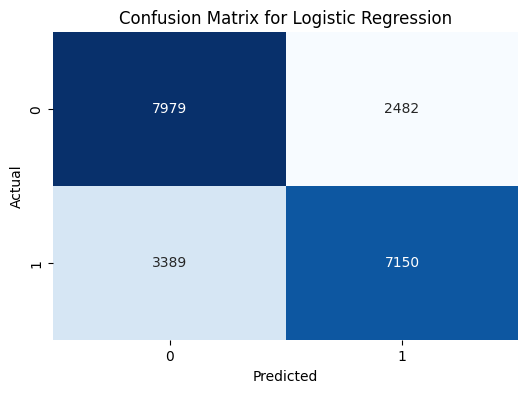

----- Random Forest -----
Accuracy: 0.7341
F1-score: 0.7246
Precision: 0.7547
Recall: 0.6967


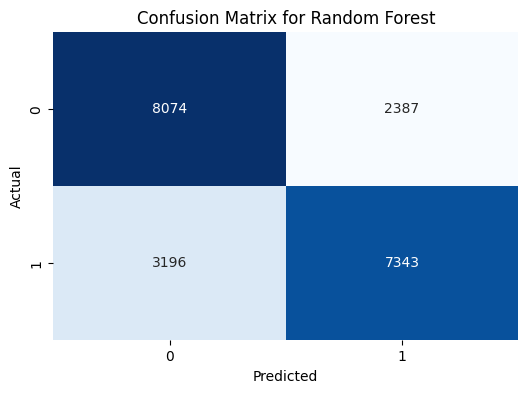

----- XGBoost -----
Accuracy: 0.7372
F1-score: 0.7258
Precision: 0.7620
Recall: 0.6929


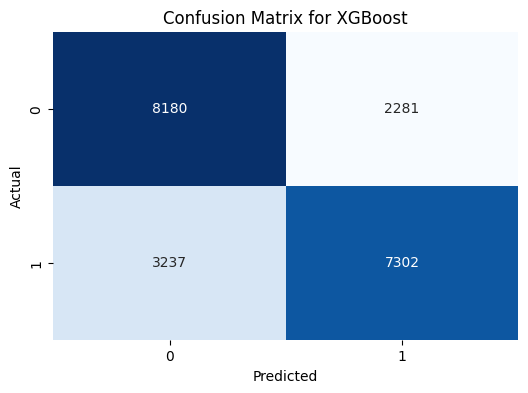

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate model performance
models = ["Logistic Regression", "Random Forest", "XGBoost"]
predictions = [lr_pred, rf_pred, xgb_pred]

for i, model_name in enumerate(models):
    print(f"----- {model_name} -----")
    accuracy = accuracy_score(y_test, predictions[i])
    f1 = f1_score(y_test, predictions[i])
    precision = precision_score(y_test, predictions[i])
    recall = recall_score(y_test, predictions[i])
    cm = confusion_matrix(y_test, predictions[i])

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# FEATURE IMPORTANCE FOR LOGISTIC REGRESSION MODEL

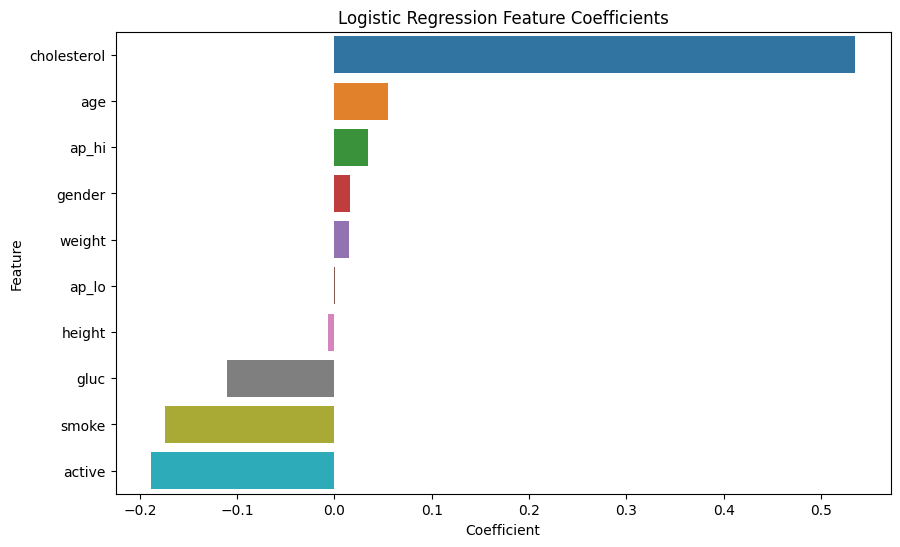

In [ ]:
# Logistic Regression Coefficients
logistic_regression_coef = lr_model.coef_[0]

# Create a DataFrame with feature names and their coefficients
logistic_regression_feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_regression_coef})
logistic_regression_feature_importance = logistic_regression_feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=logistic_regression_feature_importance)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Coefficients')
plt.show()


# FEATURE IMPORTANCE FOR RANDOM FOREST MODEL

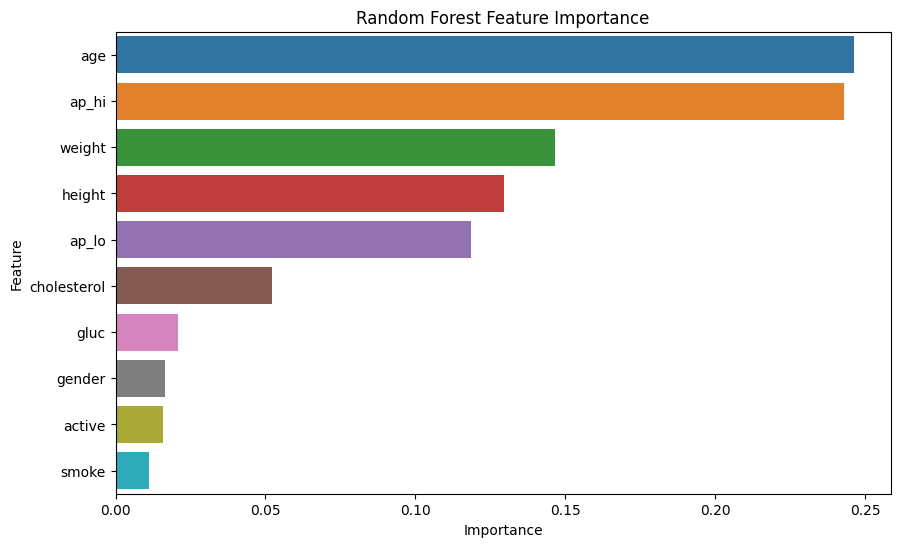

In [ ]:
# Optional: Feature Importance for Random Forest
if 'Random Forest' in models:
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Random Forest Feature Importance')
    plt.show()


# FEATURE IMPORTANCE FOR XGBOOST MODEL

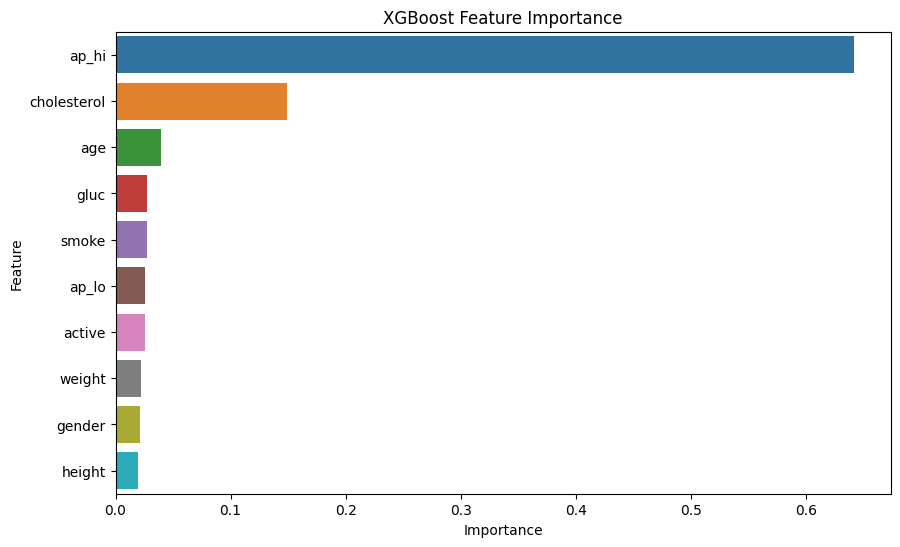

In [ ]:
# XGBoost Feature Importance
xgb_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
xgb_feature_importance = xgb_feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()
